In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/tested (1).csv')
print("\nData info")
print(data.info())
print("\nData Description")
print(data.describe())



Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

Data Description
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   


In [ ]:
print("Sample data")
print(data.head())

Sample data
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


Data Preprocessing

In [ ]:
# check missing values
print("\nMissing values:")
print(data.isnull().sum())

# Handling missing values - replace with median for numerical features and most frequent value for categorical features
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    elif data[column].isnull().any():
        data[column] = data[column].fillna(data[column].median())


# Check the frequency distribution of values in numerical variables
print("\nFrequency Distribution of Numerical Variables:")
for col in data.select_dtypes(include=np.number).columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())

# Check the frequency counts of categorical variables
print("\nFrequency Counts of Categorical Variables:")
for col in data.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(data[col].value_counts())

# Split the data into features and target variable
X = data.drop(['PassengerId', 'Name', 'Survived','Ticket','Cabin'], axis=1)
y = data['Survived']


# Convert categorical features to numerical using ordinal encoding
sex_mapping = ['male', 'female']
embarked_mapping = ['C', 'Q', 'S']


encoder = OrdinalEncoder(categories=[sex_mapping, embarked_mapping])
X[['Sex','Embarked']] = encoder.fit_transform(X[['Sex','Embarked']])


# Ensure that 'Sex' and 'Embarked' are categorical
X[['Sex', 'Embarked']] = X[['Sex', 'Embarked']].astype(str)

# Define the mappings for the categorical columns
sex_mapping = ['male', 'female']
embarked_mapping = ['C', 'Q', 'S']



Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Frequency Distribution of Numerical Variables:

Column: PassengerId
PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64

Column: Survived
Survived
0    266
1    152
Name: count, dtype: int64

Column: Pclass
Pclass
3    218
1    107
2     93
Name: count, dtype: int64

Column: Age
Age
27.0    98
21.0    17
24.0    17
22.0    16
30.0    15
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

Column: SibSp
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

Column: Parch
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: coun

In [ ]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nData types in X_train:")
print(X_train.dtypes)


Shape of X_train: (334, 8)
Shape of X_test: (84, 8)

Data types in X_train:
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
Pclass_2       bool
Pclass_3       bool
dtype: object


In [ ]:
# 4. Model Creation
model = RandomForestClassifier(random_state=42)

# 5. Model Training
model.fit(X_train, y_train)

# 6. Prediction
y_pred = model.predict(X_test)

In [ ]:
# 7. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division=0)

print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", cr)


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84




Feature Importances Plot


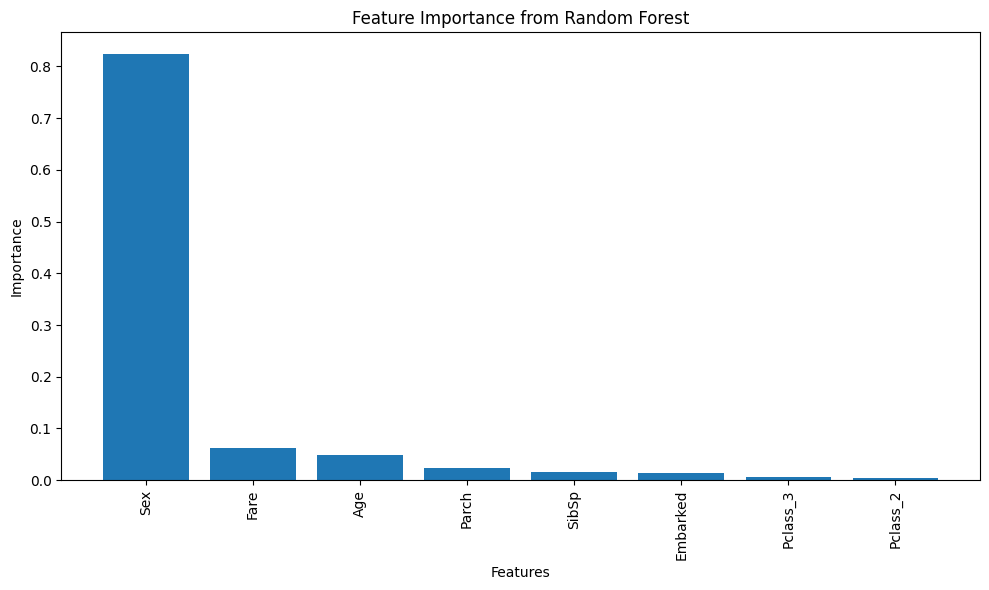

In [ ]:
# 8. Visualization
print("\nFeature Importances Plot")
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance from Random Forest")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


***Insights & Stats***

Feature Importance (Coefficients):
    feature  importance
0       Sex    0.824704
4      Fare    0.061473
1       Age    0.048253
3     Parch    0.023060
2     SibSp    0.016444
5  Embarked    0.014552
7  Pclass_3    0.006699
6  Pclass_2    0.004815

Descriptive Statistics of Target Variable:
count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

Distribution of Target Variable:


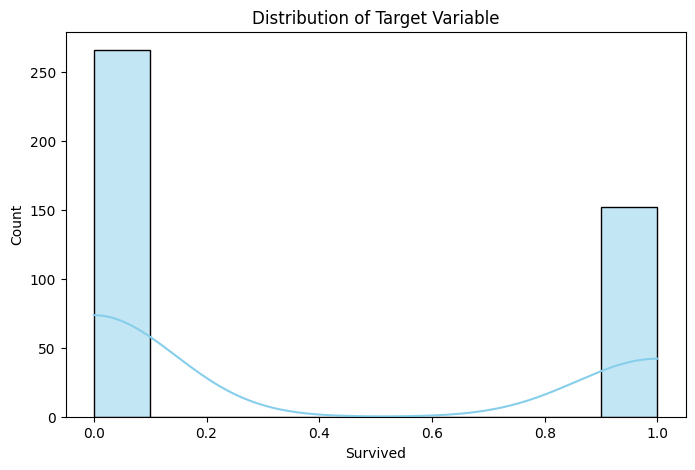


Descriptive Statistics of Numerical Features:
              Sex         Age       SibSp       Parch        Fare    Embarked
count  418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean     0.363636   29.599282    0.447368    0.392344   35.576535    1.401914
std      0.481622   12.703770    0.896760    0.981429   55.850103    0.854496
min      0.000000    0.170000    0.000000    0.000000    0.000000    0.000000
25%      0.000000   23.000000    0.000000    0.000000    7.895800    1.000000
50%      0.000000   27.000000    0.000000    0.000000   14.454200    2.000000
75%      1.000000   35.750000    1.000000    0.000000   31.471875    2.000000
max      1.000000   76.000000    8.000000    9.000000  512.329200    2.000000


In [ ]:
# 9. Insights and Stats
print("\n***Insights & Stats***")

#Feature Importance
print("\nFeature Importance (Coefficients):")
print(feature_importance)

#Descriptive statistics of target variable
print("\nDescriptive Statistics of Target Variable:")
print(y.describe())

# Distribution of target variable
print("\nDistribution of Target Variable:")
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='skyblue')
plt.title("Distribution of Target Variable")
plt.show()

# Descriptive statistics of numerical features
print("\nDescriptive Statistics of Numerical Features:")
print(X.describe())